In [ ]:
####### Robust Image Analysis of Hand-Drawn Sketch with Variable Disturbances #################

In [ ]:
### Data Loading

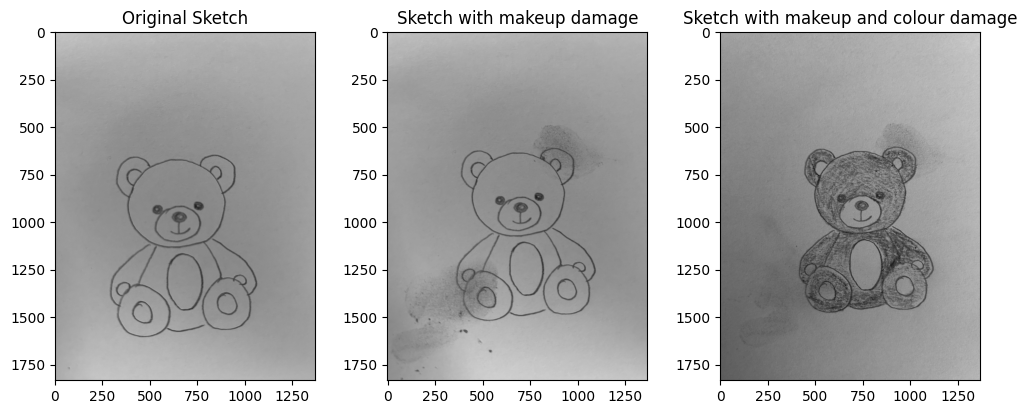

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

sketch_original= cv2.imread('/Users/malinamircescu/Desktop/bear1.png', cv2.IMREAD_GRAYSCALE)
sketch_with_one_disturbance = cv2.imread('/Users/malinamircescu/Desktop/bear2.png', cv2.IMREAD_GRAYSCALE)
sketch_with_two_disturbances = cv2.imread('/Users/malinamircescu/Desktop/bear3.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sketch_original, cv2.COLOR_BGR2RGB))
plt.title('Original Sketch')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(sketch_with_one_disturbance, cv2.COLOR_BGR2RGB))
plt.title('Sketch with makeup damage')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sketch_with_two_disturbances, cv2.COLOR_BGR2RGB))
plt.title('Sketch with makeup and colour damage')
plt.tight_layout(w_pad=2)
plt.show()

In [70]:
images = [sketch_original, sketch_with_one_disturbance, sketch_with_two_disturbances]

In [ ]:
##### Edge detection ##############

In [54]:
from scipy.ndimage import convolve

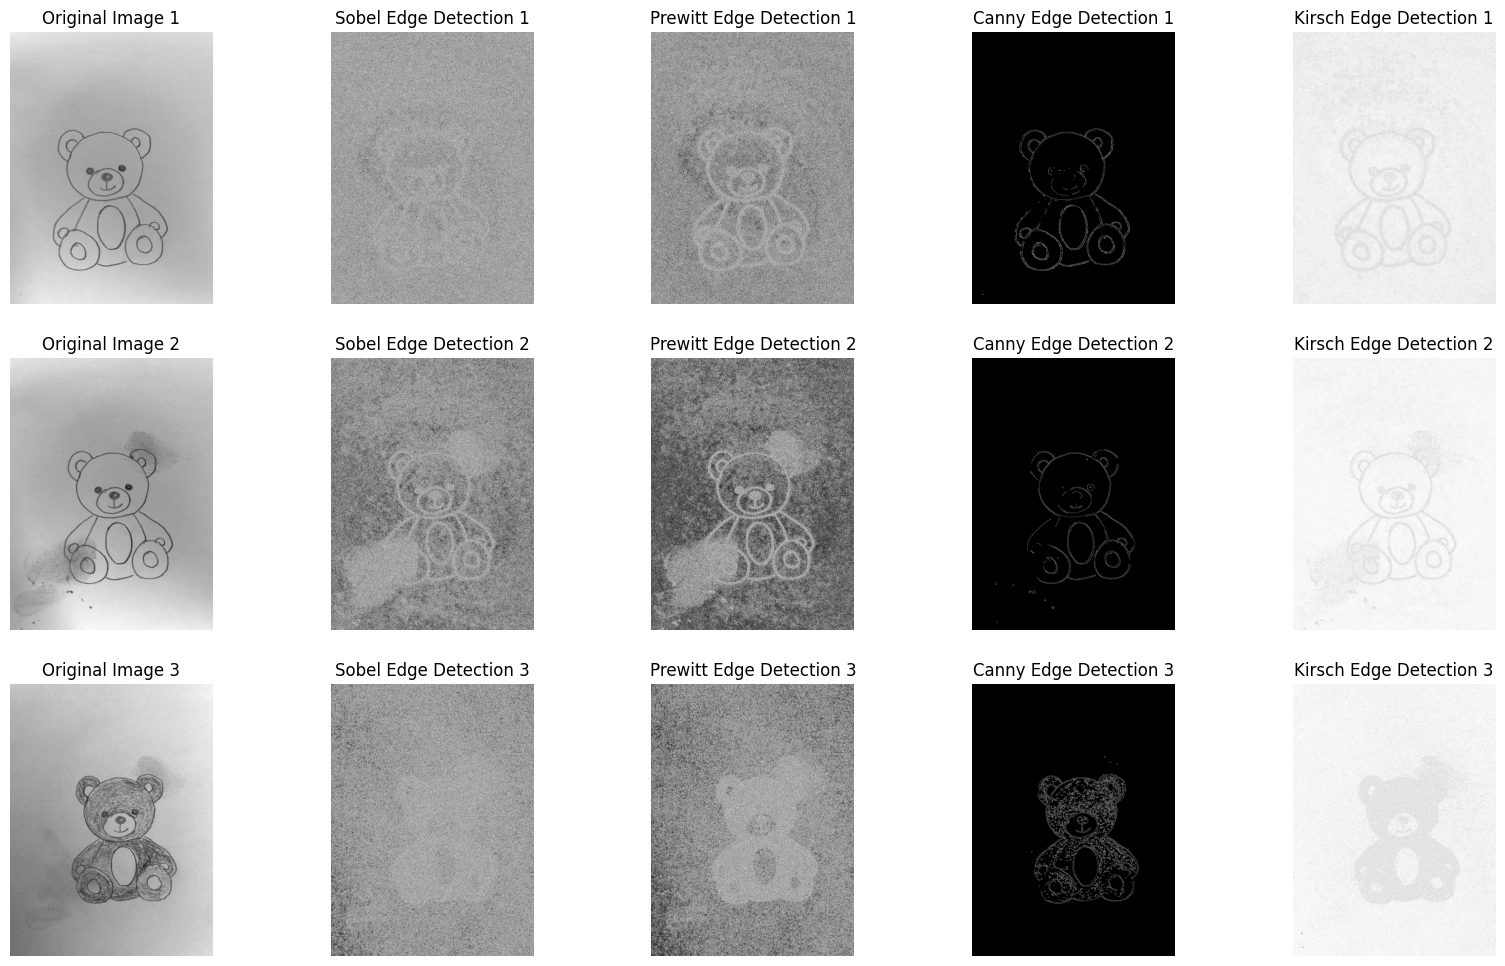

In [61]:
# Sobel operator kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Kirsch masks
kirsch_masks = [
    np.array([[5,  5,  5], [-3, 0, -3], [-3, -3, -3]]),  # North
    np.array([[-3,  5,  5], [-3, 0,  5], [-3, -3, -3]]),  # Northeast
    np.array([[-3, -3,  5], [-3, 0,  5], [-3, -3,  5]]),  # East
    np.array([[-3, -3, -3], [-3, 0,  5], [-3,  5,  5]]),  # Southeast
    np.array([[-3, -3, -3], [-3, 0, -3], [ 5,  5,  5]]),  # South
    np.array([[-3, -3, -3], [ 5, 0, -3], [ 5,  5, -3]]),  # Southwest
    np.array([[ 5, -3, -3], [ 5, 0, -3], [ 5,  5, -3]]),  # West
    np.array([[ 5,  5, -3], [ 5, 0, -3], [-3, -3, -3]])   # Northwest
]

# Initialize results
sobel_results = []
prewitt_results = []
canny_results = []
kirsch_results = []

# Process each image
for img in images:
    # Sobel operator
    edges_x = convolve(img, sobel_x)
    edges_y = convolve(img, sobel_y)
    sobel_magnitude = np.sqrt(edges_x**2 + edges_y**2)
    sobel_results.append(sobel_magnitude)

    # Prewitt operator
    prewitt_x = convolve(img, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = convolve(img, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
    prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)
    prewitt_results.append(prewitt_edges)

    # Canny edge detection
    canny_edges = cv2.Canny(img, 100, 200)  # Using OpenCV for Canny
    canny_results.append(canny_edges)

    # Kirsch operator
    kirsch_response = np.zeros_like(img, dtype=float)
    for mask in kirsch_masks:
        response = convolve(img, mask)
        kirsch_response = np.maximum(kirsch_response, response)
    kirsch_results.append(kirsch_response)


fig, axes = plt.subplots(3, 5, figsize=(20, 12))
for i, (original, sobel, prewitt, canny, kirsch) in enumerate(zip(images, sobel_results, prewitt_results, canny_results, kirsch_results)):
    # Original image
    axes[i, 0].imshow(original, cmap='gray')
    axes[i, 0].set_title(f"Original Image {i+1}")
    axes[i, 0].axis("off")

    # Sobel result
    axes[i, 1].imshow(sobel, cmap='gray')
    axes[i, 1].set_title(f"Sobel Edge Detection {i+1}")
    axes[i, 1].axis("off")

    # Prewitt result
    axes[i, 2].imshow(prewitt, cmap='gray')
    axes[i, 2].set_title(f"Prewitt Edge Detection {i+1}")
    axes[i, 2].axis("off")

    # Canny result
    axes[i, 3].imshow(canny, cmap='gray')
    axes[i, 3].set_title(f"Canny Edge Detection {i+1}")
    axes[i, 3].axis("off")

    # Kirsch result
    axes[i, 4].imshow(kirsch, cmap='gray')
    axes[i, 4].set_title(f"Kirsch Edge Detection {i+1}")
    axes[i, 4].axis("off")

plt.show()


In [ ]:
######## Image Denoising ########

For image denoising we'll combine spatial noise filters through the use of mean filters with 
order statistical filters through the use of median filter

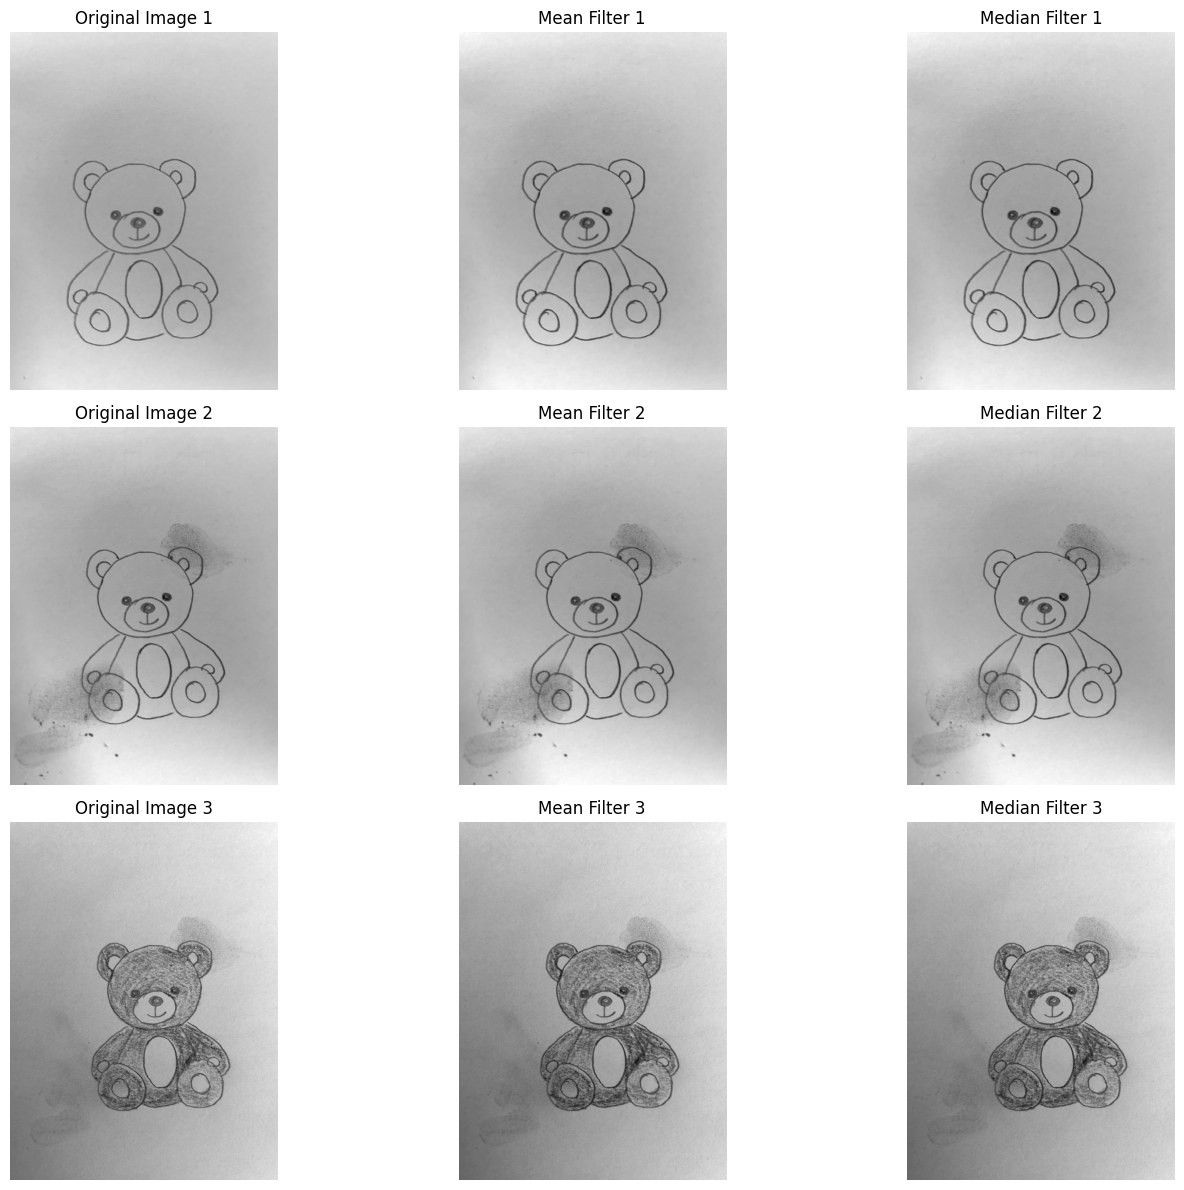

In [62]:
def apply_mean_filter(image, size=3):
    kernel = np.ones((size, size), dtype=float) / (size * size)
    return convolve(image, kernel)

def apply_median_filter(image, size=3):
    return cv2.medianBlur(image, size)

# Initialize results
mean_filtered_results = []
median_filtered_results = []

# Apply denoising filters
for img in images:
    # Mean filter
    mean_filtered = apply_mean_filter(img)
    mean_filtered_results.append(mean_filtered)

    # Median filter
    median_filtered = apply_median_filter(img)
    median_filtered_results.append(median_filtered)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, (original, mean_filtered, median_filtered) in enumerate(zip(images, mean_filtered_results, median_filtered_results)):
    # Original image
    axes[i, 0].imshow(original, cmap='gray')
    axes[i, 0].set_title(f"Original Image {i+1}")
    axes[i, 0].axis("off")

    # Mean filter result
    axes[i, 1].imshow(mean_filtered, cmap='gray')
    axes[i, 1].set_title(f"Mean Filter {i+1}")
    axes[i, 1].axis("off")

    # Median filter result
    axes[i, 2].imshow(median_filtered, cmap='gray')
    axes[i, 2].set_title(f"Median Filter {i+1}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#################### Segmentation #######

In [63]:
from skimage.filters import threshold_otsu
from skimage.segmentation import random_walker

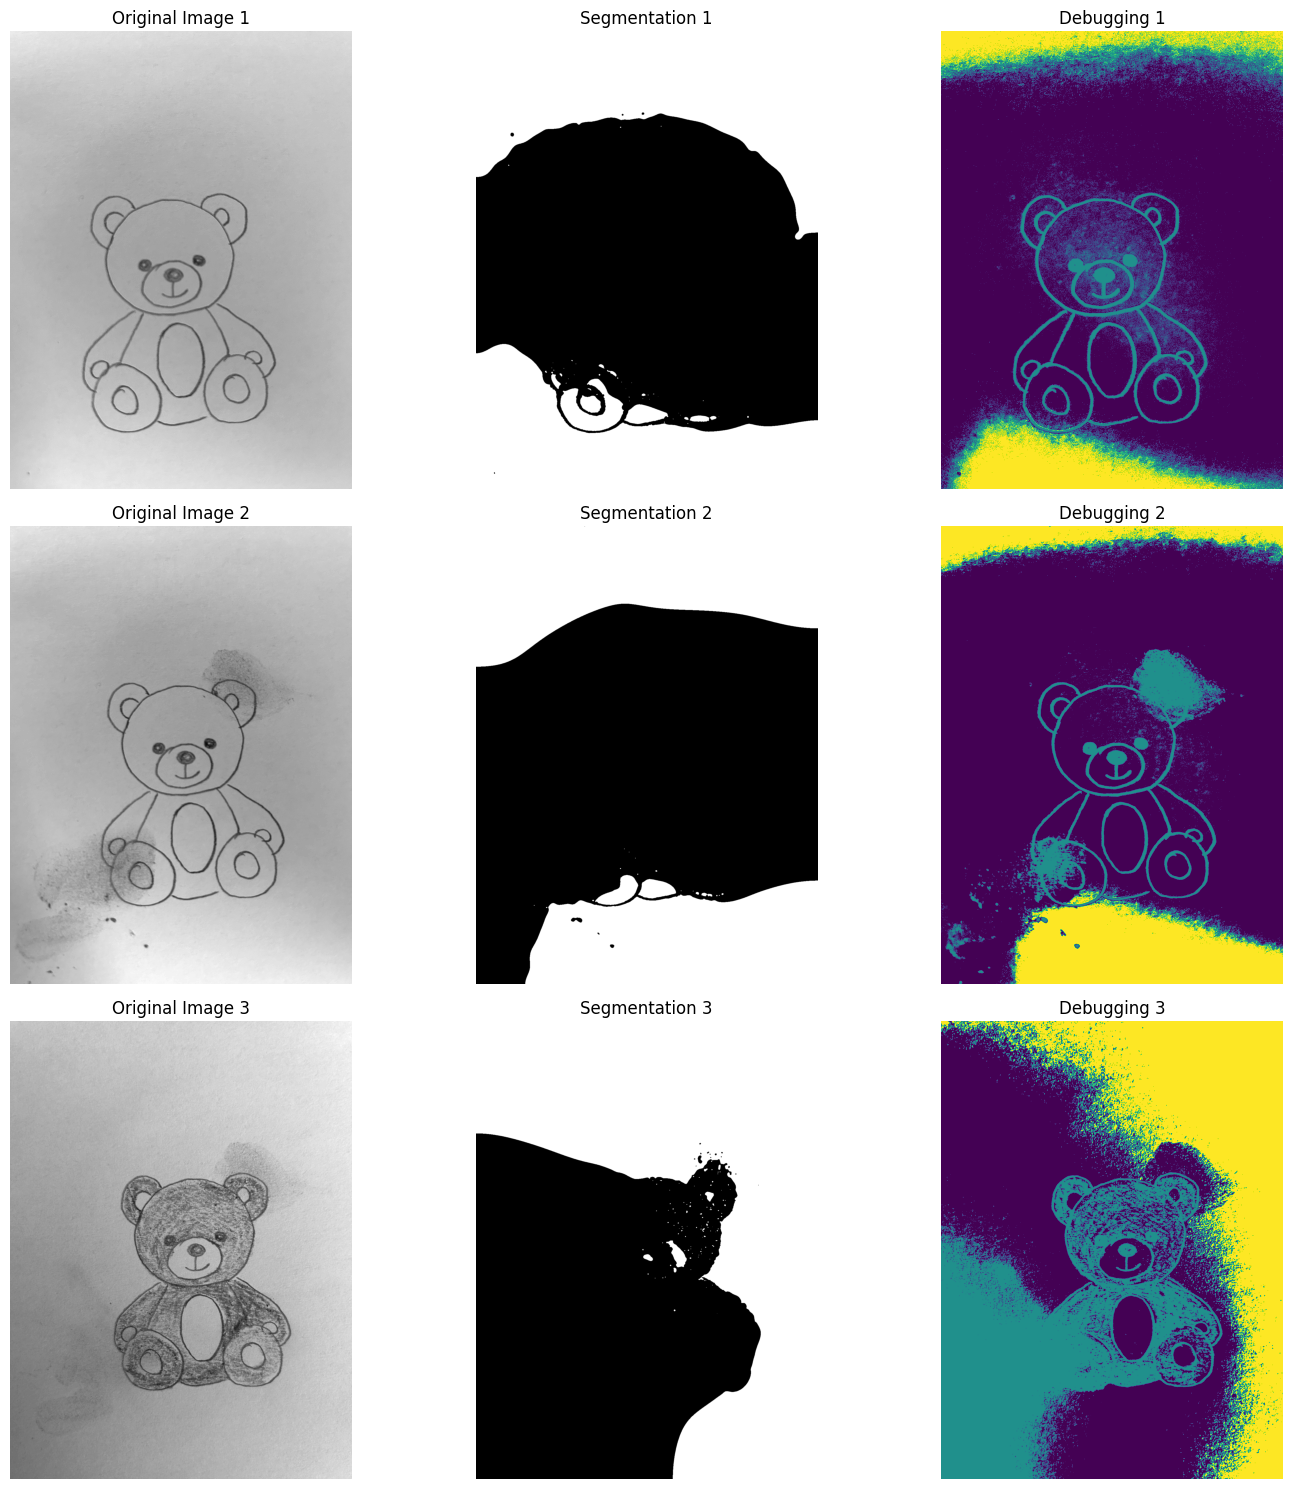

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import random_walker

urg_results = []
seeds_list = []

for img in images:
    # Normalize image
    img_normalized = img / 255.0  # Normalize to [0, 1]

    # Improved seed placement for URG
    seeds = np.zeros_like(img, dtype=np.int32)
    seeds[img < np.mean(img) - 20] = 1  # Darker regions
    seeds[img > np.mean(img) + 20] = 2  # Brighter regions
    seeds_list.append(seeds)

    # Apply random walker
    urg_result = random_walker(img_normalized, seeds, beta=90, mode='bf')
    urg_results.append(urg_result)

fig, axes = plt.subplots(len(images), 3, figsize=(15, 5 * len(images)))
for idx, (img, urg, seeds) in enumerate(zip(images, urg_results, seeds_list)):
    axes[idx, 0].imshow(img, cmap='gray')
    axes[idx, 0].set_title(f"Original Image {idx + 1}")
    axes[idx, 0].axis("off")

    axes[idx, 1].imshow(urg, cmap='gray')
    axes[idx, 1].set_title(f"Segmentation {idx + 1}")
    axes[idx, 1].axis("off")

    axes[idx, 2].imshow(seeds, cmap='viridis')
    axes[idx, 2].set_title(f"Debugging {idx + 1}")
    axes[idx, 2].axis("off")

plt.tight_layout()
plt.show()
